In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from matplotlib import style
style.use('ggplot')

In [54]:
x = np.array([[1, 2], [1.5, 1.8], [2, 4], [9, 8], [8, 8], [9, 8.7]])

In [55]:
x

array([[1. , 2. ],
       [1.5, 1.8],
       [2. , 4. ],
       [9. , 8. ],
       [8. , 8. ],
       [9. , 8.7]])

[]

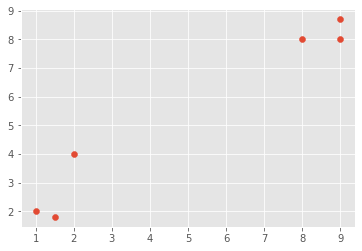

In [56]:
plt.scatter(x[:, 0], x[:, 1])
plt.plot()

In [62]:
class KMeans:
    def __init__(self, k=2, tol=0.01, epochs=300):
        self.k = k
        self.tol = tol
        self.epochs = epochs

    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for i in range(self.epochs):
#             if i % 50 == 0:
            print('Epoch: ', str(i))
            
#             print('initial_centroids: ', self.centroids)
            # initialize classifications dict
            # key will be class, value will be list of points belonging to cass
            self.classifications = {}
            
            # initialize classifications as list
            for j in range(self.k):
                self.classifications[j] = []
                
            for point in data:
                # get distance between point and centroid as a l2 norm
                distances = [np.linalg.norm(point - self.centroids[centroid]) for centroid in self.centroids]
                # get class to which point belongs
                _class = distances.index(min(distances))
                # add point to class
                self.classifications[_class].append(point)
                
            # preserve previous centroids
            prev_centroids = dict(self.centroids)
#             print('prev_centroids: ', prev_centroids)
            # get new centroids as average of the values of the points belonging to the class of the centroid
            for _class in self.classifications:
                self.centroids[_class] = np.average(self.classifications[_class], axis=0)
            
#             print(self.centroids)
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                new_centroid = self.centroids[c]
                
                if np.sum((new_centroid-original_centroid)/original_centroid*100.0 > self.tol):
                    optimized = False
                
                if optimized:
                    break
            
                
    def predict(self, point):
        distances = [np.linalg.norm(point - self.centroids[centroid]) for centroid in self.centroids]
        _class = distances.index(min(distances))
        return _class

In [63]:
print(x)
model = KMeans()
model.fit(x)

[[1.  2. ]
 [1.5 1.8]
 [2.  4. ]
 [9.  8. ]
 [8.  8. ]
 [9.  8.7]]
Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  

[]

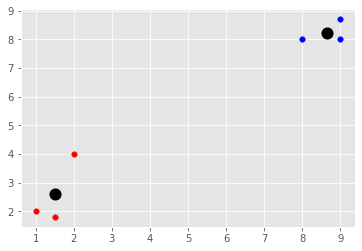

In [64]:
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], marker='o', color='k', s=50, linewidth=5)
colors = ['red', 'blue']
i = 0
for _class in model.classifications:
    color = colors[i]
    i += 1
    for point in model.classifications[_class]:
        plt.scatter(point[0], point[1], color=color, s=30)
plt.plot()